[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[*********************100%%**********************]  1 of 1 completed
                           Open        High         Low       Close  \
Datetime                                                              
2024-01-02 09:30:00  250.080002  250.899994  244.410004  248.794006   
2024-01-02 10:00:00  248.779999  251.250000  248.050003  249.610001   
2024-01-02 10:30:00  249.600006  249.638199  246.820007  248.919998   
2024-01-02 11:00:00  248.899994  250.259995  248.339996  250.000000   
2024-01-02 11:30:00  249.994095  251.000000  249.900101  250.475403   
...                         ...         ...         ...         ...   
2024-01-26 13:30:00  183.490097  183.630005  182.291000  182.644394   
2024-01-26 14:00:00  182.654999  182.660004  182.100006  182.280106   
2024-01-26 14:30:00  182.300003  183.380005  182.119995  183.270004   
2024-01-26 15:00:00  183.270004  183.320007  182.380005  182.630005   
2024-01-26 15:30:00  182.629898  183.470001  182.610001  183.229904   

       

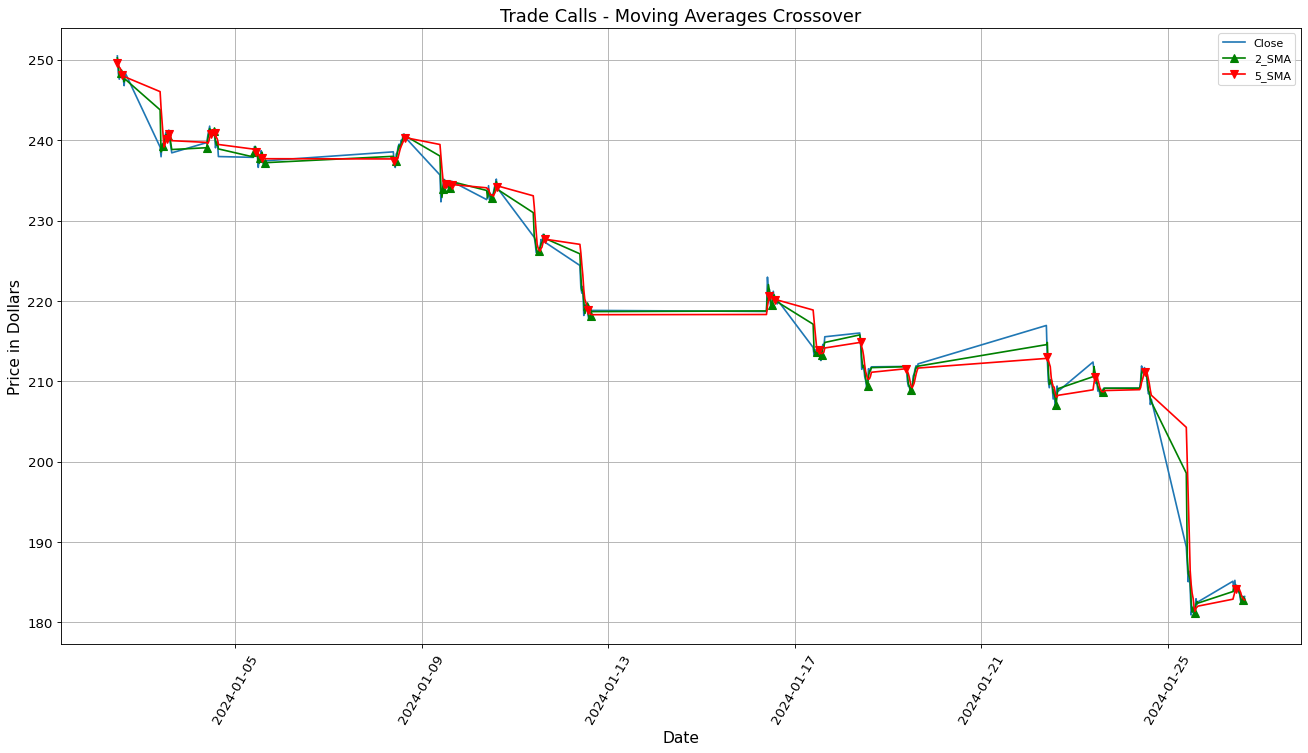

In [1]:
import pandas as pd
import requests 
from finVADER import finvader
import matplotlib.pyplot as plt
from pyfile.scrapestockdata import data_tsla, Trade_Buy, Trade_Sell

In [2]:
news_df = pd.read_csv('tsla_cleaned.csv')

final_news = news_df.loc[:,['date','no_sw_cmt']]
final_news['date'] = pd.to_datetime(final_news['date'])
final_news.sort_values(by='date',inplace=True)
final_news

,date,no_sw_cmt
424,2024-01-03 09:26:37,Bullish Lunr
436,2024-01-04 19:23:34,Sounds similar strategy Except buy ones rated ...
426,2024-01-04 19:27:57,thanks turn stone
438,2024-01-08 14:49:47,Agreed worth time
363,2024-01-09 06:39:54,dangerous bet sure Right lot non revenue gener...
...,...,...
252,2024-01-30 10:08:37,Tesla haters basically cult every single time ...
199,2024-01-30 10:09:18,scary thing worth multiples today
205,2024-01-30 10:10:38,Yes sold Easy flip side imagine Tesla unthinka...
656,2024-01-30 13:27:24,Lol Day traded today tsla long side today


In [3]:
# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [4]:
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["date"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
final_news['no_sw_cmt'] = final_news['no_sw_cmt'].astype(str)
final_news['compound_finvader_score'] = final_news['no_sw_cmt'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_26260\2860176680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26260\2860176680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['no_sw_cmt'] = final_news['no_sw_cmt'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_26260\2860176680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,date,no_sw_cmt,trading_time,Date,compound_finvader_score
424,2024-01-03 09:26:37,Bullish Lunr,2024-01-03 13:30:00,2024-01-03,-0.0090
363,2024-01-09 06:39:54,dangerous bet sure Right lot non revenue gener...,2024-01-09 13:30:00,2024-01-09,0.8961
376,2024-01-09 06:41:59,timing hard Could eventually right Sure market...,2024-01-09 13:30:00,2024-01-09,-0.1368
361,2024-01-09 06:44:29,might worst analysis seen lol Please short,2024-01-09 13:30:00,2024-01-09,0.0798
371,2024-01-09 06:50:01,Market irrational company Honestly short anyth...,2024-01-09 13:30:00,2024-01-09,0.4651
...,...,...,...,...,...
1391,2024-01-30 09:58:07,honestly elon laughing earnings call enough si...,2024-01-30 13:30:00,2024-01-30,0.7367
252,2024-01-30 10:08:37,Tesla haters basically cult every single time ...,2024-01-30 13:30:00,2024-01-30,-0.4888
199,2024-01-30 10:09:18,scary thing worth multiples today,2024-01-30 13:30:00,2024-01-30,-0.0052
205,2024-01-30 10:10:38,Yes sold Easy flip side imagine Tesla unthinka...,2024-01-30 13:30:00,2024-01-30,-0.3105


In [5]:
# final_news['compound_finvader_score'] = cs
final_news = final_news[(final_news[['compound_finvader_score']] != 0).all(axis=1)].reset_index(drop=True)
final_news

,date,no_sw_cmt,trading_time,Date,compound_finvader_score
0,2024-01-03 09:26:37,Bullish Lunr,2024-01-03 13:30:00,2024-01-03,-0.0090
1,2024-01-09 06:39:54,dangerous bet sure Right lot non revenue gener...,2024-01-09 13:30:00,2024-01-09,0.8961
2,2024-01-09 06:41:59,timing hard Could eventually right Sure market...,2024-01-09 13:30:00,2024-01-09,-0.1368
3,2024-01-09 06:44:29,might worst analysis seen lol Please short,2024-01-09 13:30:00,2024-01-09,0.0798
4,2024-01-09 06:50:01,Market irrational company Honestly short anyth...,2024-01-09 13:30:00,2024-01-09,0.4651
...,...,...,...,...,...
2262,2024-01-30 09:58:07,honestly elon laughing earnings call enough si...,2024-01-30 13:30:00,2024-01-30,0.7367
2263,2024-01-30 10:08:37,Tesla haters basically cult every single time ...,2024-01-30 13:30:00,2024-01-30,-0.4888
2264,2024-01-30 10:09:18,scary thing worth multiples today,2024-01-30 13:30:00,2024-01-30,-0.0052
2265,2024-01-30 10:10:38,Yes sold Easy flip side imagine Tesla unthinka...,2024-01-30 13:30:00,2024-01-30,-0.3105


In [6]:
#Retaining extreme (max and min) compound scores for same Day news headlines
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_finvader_score"].max() > 0:
        max_cs.append(data["compound_finvader_score"].max())
    elif data["compound_finvader_score"].max() < 0:
        max_cs.append(0)

    if data["compound_finvader_score"].min() < 0:
        min_cs.append(data["compound_finvader_score"].min())
    elif data["compound_finvader_score"].min() > 0:
        min_cs.append(0)

In [7]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

#summing and calculating finVader score
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores
extreme_scores_df

,Date,max_scores,min_scores,final_scores
0,2024-01-03,0.0000,-0.0090,-0.0090
1,2024-01-09,0.8961,-0.5307,0.3654
2,2024-01-10,0.7927,-0.7900,0.0027
3,2024-01-11,0.5163,0.0000,0.5163
4,2024-01-15,0.6280,0.0000,0.6280
5,2024-01-16,0.8093,-0.9401,-0.1308
6,2024-01-17,0.7540,-0.9288,-0.1748
7,2024-01-18,0.6318,-0.3100,0.3218
8,2024-01-19,0.5845,-0.7184,-0.1339
9,2024-01-22,0.9386,-0.7543,0.1843


In [8]:
#Using final compound finVADER scores with threshold to generate trade calls
# finVADER trade calls - with threshold
finvader_Buy=[]
finvader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.33:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.33:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

finvader_buy = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Buy:
        finvader_buy.append(i)

finvader_sell = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Sell:
        finvader_sell.append(i)

print(finvader_buy)
print(finvader_sell)

Trade Call for 2024-01-09 is Buy.
Trade Call for 2024-01-11 is Buy.
Trade Call for 2024-01-15 is Buy.
Trade Call for 2024-01-24 is Sell.
[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]


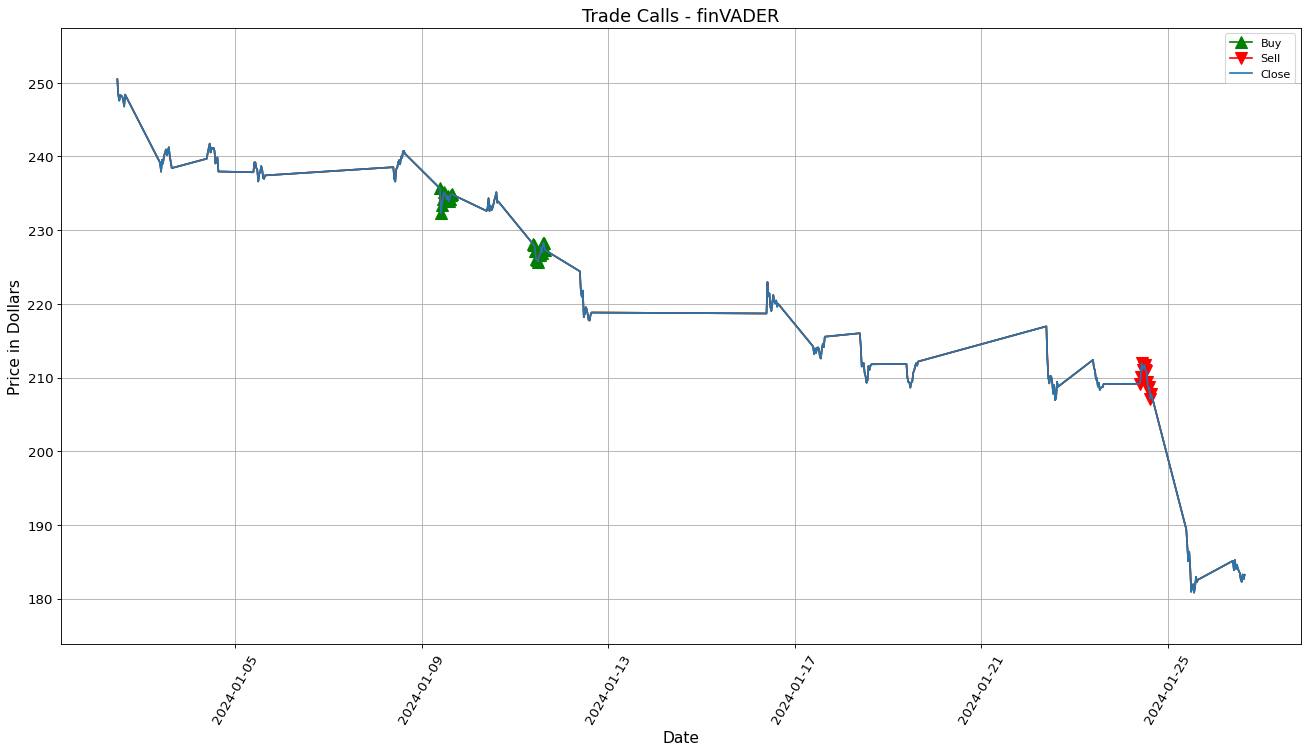

In [9]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=finvader_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=finvader_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - finVADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.margins(x=0.05, y=0.10)  # 5% padding for x-axis, 10% for y-axis
plt.grid(True)
plt.show()

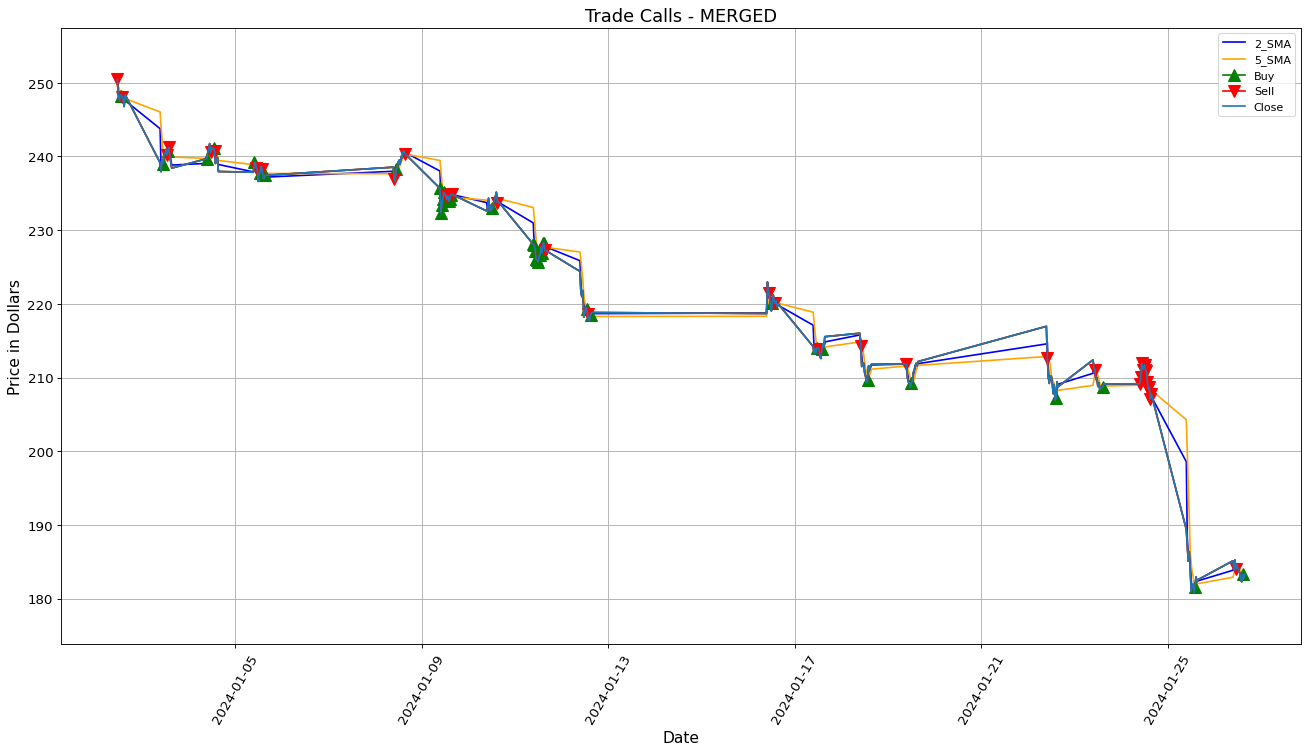

[130, 4, 135, 12, 17, 147, 22, 157, 29, 36, 42, 47, 175, 51, 188, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 80, 213, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 227, 107, 111, 119]
[0, 132, 5, 140, 16, 18, 152, 26, 30, 38, 166, 44, 49, 180, 60, 191, 192, 193, 194, 67, 196, 195, 197, 198, 199, 73, 200, 201, 202, 203, 85, 220, 99, 108, 116, 122]


In [10]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + finvader_buy) - set(Trade_Sell))
final_sell = list(set(Trade_Sell + finvader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['2_SMA'], color='blue')
plt.plot(data_tsla.index, data_tsla['5_SMA'], color='orange')
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=final_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=final_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.margins(x=0.05, y=0.10)  # 5% padding for x-axis, 10% for y-axis
plt.grid(True)
plt.show()

print(final_buy)
print(final_sell)

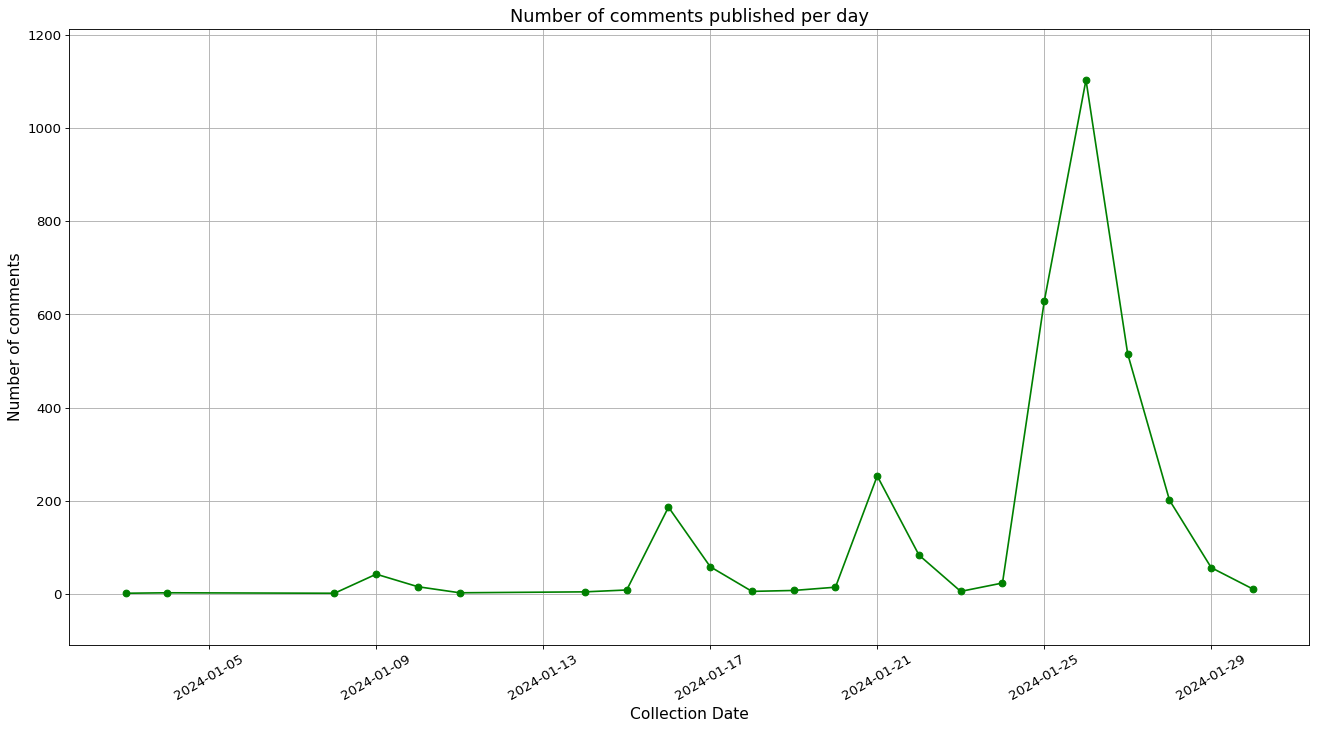

In [11]:
import matplotlib.pyplot as plt


# Đảm bảo rằng cột 'date' là kiểu dữ liệu datetime
news_df['date'] = pd.to_datetime(news_df['date'])
news_df['Date'] = news_df['date'].dt.date

# Tính toán số lượng content mỗi ngày
content_count = news_df.groupby('Date').size()

# Vẽ biểu đồ
plt.figure(figsize=(20,10), dpi=80)
content_count.plot(kind='line', marker='o', color='green')
plt.title('Number of comments published per day', fontsize = 16)
plt.xlabel('Collection Date', fontsize=14)
plt.ylabel('Number of comments',fontsize = 14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.margins(x=0.05, y=0.10)  # 5% padding for x-axis, 10% for y-axis
plt.grid(True)
plt.show()

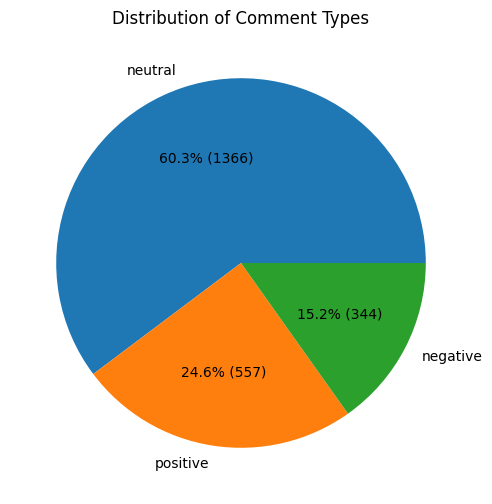

In [12]:
# Phân loại comment
final_news['comment_type'] = final_news['compound_finvader_score'].apply(lambda x: 'positive' if x > 0.33 
                                                                         else ('negative' if x < -0.33 
                                                                        else 'neutral'))

# Đếm số lượng comment cho mỗi loại
comment_counts = final_news['comment_type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
comment_counts.plot.pie(autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*comment_counts.sum()))
plt.title('Distribution of Comment Types')
plt.ylabel('')
plt.show()

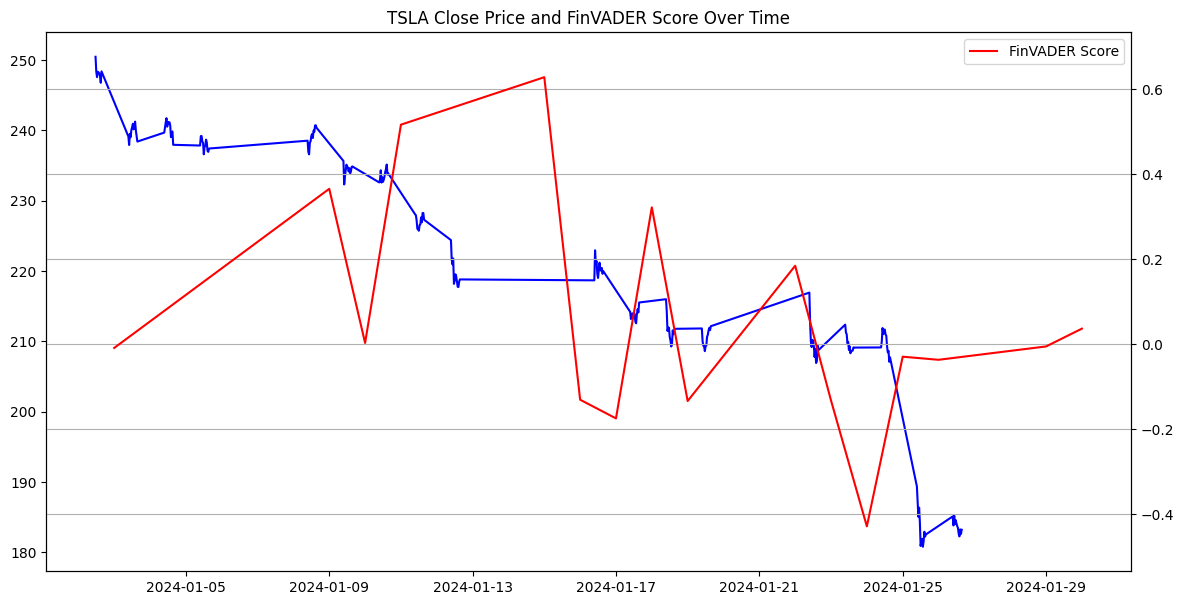

In [13]:
data_tsla = data_tsla.reset_index()
# Đảm bảo rằng cả hai DataFrame đều được sắp xếp theo 'Date' và đặt 'Date' làm index
data_tsla = data_tsla.sort_values('Datetime').set_index('Datetime')
extreme_scores_df = extreme_scores_df.sort_values('Date').set_index('Date')



# Vẽ biểu đồ đường cho giá đóng cửa
plt.figure(figsize=(14, 7))
plt.plot(data_tsla['Close'], label='TSLA Close Price', color='blue')

# Vẽ biểu đồ đường cho điểm FinVADER
# Chúng ta sử dụng plt.twinx() để vẽ biểu đồ trên cùng một hình nhưng với hai trục y khác nhau
plt.twinx()
plt.plot(extreme_scores_df['final_scores'], label='FinVADER Score', color='red')

plt.title('TSLA Close Price and FinVADER Score Over Time')
plt.xlabel('Date')
plt.legend()
plt.margins(x=0.05, y=0.10)  # 5% padding for x-axis, 10% for y-axis
plt.grid()
plt.show()

In [14]:
# Chuyển đổi 'Datetime' và 'Date' thành cùng một định dạng ngày
data_tsla.index = pd.to_datetime(data_tsla.index).date
extreme_scores_df.index = pd.to_datetime(extreme_scores_df.index).date

# Tính toán hệ số tương quan
correlation = data_tsla['Close'].corr(extreme_scores_df['final_scores'], method='pearson')

print(f"The correlation between the TSLA Close Price and the FinVADER Score is {correlation}")

The correlation between the TSLA Close Price and the FinVADER Score is 0.30525049583407343


In [15]:
# Kết hợp hai DataFrame bằng cột index
merged_df = data_tsla.join(extreme_scores_df, how='inner')

# Tính toán tương quan giữa SMA và điểm compound
correlation_matrix = merged_df[['2_SMA', '5_SMA', 'final_scores']].corr()

# In ma trận tương quan
print(correlation_matrix)

                 2_SMA     5_SMA  final_scores
2_SMA         1.000000  0.994790      0.308478
5_SMA         0.994790  1.000000      0.318543
final_scores  0.308478  0.318543      1.000000


In [18]:
from backtesting.test import SMA
from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover


class SmaCrosss(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 2
    n2 = 5
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        index = len(self.data) - 1
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

data_tesla = pd.read_csv('data_tsla.csv', index_col='Datetime', parse_dates=True)
bt = Backtest(data_tesla, SmaCrosss, cash= 10000, commission=.002)

stat = bt.run()
bt.plot()
stat

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
C:\Users\DELL\AppD

Start                     2024-01-02 09:30:00
End                       2024-01-26 15:30:00
Duration                     24 days 06:00:00
Exposure Time [%]                   97.435897
Equity Final [$]                 10417.860007
Equity Peak [$]                  10458.268195
Return [%]                             4.1786
Buy & Hold Return [%]              -26.352766
Return (Ann.) [%]                  101.805145
Volatility (Ann.) [%]              114.130894
Sharpe Ratio                         0.892003
Sortino Ratio                        4.550859
Calmar Ratio                            7.367
Max. Drawdown [%]                  -13.819077
Avg. Drawdown [%]                   -2.656304
Max. Drawdown Duration       22 days 02:00:00
Avg. Drawdown Duration        3 days 10:30:00
# Trades                                   48
Win Rate [%]                        35.416667
Best Trade [%]                      13.108357
Worst Trade [%]                     -2.217239
Avg. Trade [%]                    

In [30]:
data_tsla1 = data_tsla.copy()
data_tsla1 = data_tsla1.reset_index()
print(data_tsla1)
# Get the 'Datetime' values for each index in 'finvader_buy' and 'finvader_sell'
buy_dates = data_tsla1.loc[finvader_buy, 'index']
sell_dates = data_tsla1.loc[finvader_sell, 'index']

# Drop duplicates, keeping the first occurrence
buy_dates = buy_dates.drop_duplicates(keep='last')
sell_dates = sell_dates.drop_duplicates(keep='last')

# Get the final indices
finvader_buy1 = buy_dates.index
finvader_sell1 = sell_dates.index

print(finvader_buy1)
print(finvader_sell1)

finvader_buy1 = finvader_buy1.tolist()
finvader_sell1 = finvader_sell1.tolist()

print(finvader_buy1)
print(finvader_sell1)

          index        Open        High         Low       Close   Adj Close  \
0    2024-01-02  249.994095  251.000000  249.900101  250.475403  250.475403   
1    2024-01-02  250.449997  250.660004  247.941696  248.350006  248.350006   
2    2024-01-02  248.354996  249.132996  247.490005  247.581406  247.581406   
3    2024-01-02  247.583801  248.720001  247.000000  248.351700  248.351700   
4    2024-01-02  248.389999  249.380005  247.949997  248.248398  248.248398   
..          ...         ...         ...         ...         ...         ...   
225  2024-01-26  183.490097  183.630005  182.291000  182.644394  182.644394   
226  2024-01-26  182.654999  182.660004  182.100006  182.280106  182.280106   
227  2024-01-26  182.300003  183.380005  182.119995  183.270004  183.270004   
228  2024-01-26  183.270004  183.320007  182.380005  182.630005  182.630005   
229  2024-01-26  182.629898  183.470001  182.610001  183.229904  183.229904   

      Volume       2_SMA       5_SMA  
0    6197232

In [31]:
final_buy1 = list(set(Trade_Buy + finvader_buy1) - set(Trade_Sell))
final_sell1 = list(set(Trade_Sell + finvader_sell1) - set(Trade_Buy))

print(final_buy1)
print(final_sell1)

[130, 4, 135, 12, 17, 147, 22, 157, 29, 36, 42, 47, 175, 51, 188, 64, 71, 80, 213, 93, 227, 107, 111, 119]
[0, 132, 5, 140, 16, 18, 152, 26, 30, 38, 166, 44, 49, 180, 60, 67, 196, 73, 203, 85, 220, 99, 108, 116, 122]
